<a href="https://colab.research.google.com/github/Asigen93/Kelompok-RoundTable-Prediksi-Peforma-Pemain-Sepak-Bola-Berdasarkan-Usia-Random-Forest/blob/main/Prediksi_Peforma_Pemain_Bola_Berdasarkan_Usia_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# **Load Dataset**

In [150]:
file_path = 'complete.csv'
data = pd.read_csv(file_path, delimiter=';')

<ipython-input-150-ecf03e68a935>:2: DtypeWarning: Columns (16,18) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter=';')


# **Pilih Kolom yang Relevan dan Tangani Nilai yang Hilang**

In [151]:
# Pilih kolom yang relevan dan hapus baris dengan nilai yang hilang
relevant_columns = ['age', 'height_cm', 'weight_kg', 'eur_value', 'potential', 'overall', 'pac', 'sho', 'pas', 'dri', 'def', 'phy']
subset_data = data[relevant_columns].dropna()

# **Mengonversi Kolom Relevan ke Tipe Data Numerik**

In [152]:
# Ubah semua kolom yang relevan menjadi numerik (jika tidak)
for col in relevant_columns:
    subset_data[col] = pd.to_numeric(subset_data[col], errors='coerce')

# **Menghapus Baris yang Mengandung Nilai NaN Setelah Konversi**

In [153]:
# Hapus baris apa pun yang telah menjadi NaN setelah konversi
subset_data = subset_data.dropna()

# **Data Preprocessing**

In [154]:
# Memisahkan data menjadi fitur dan variabel target
X = subset_data.drop(columns=['overall'])
y = subset_data['overall']

# Memisahkan data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Latih Model Random Forest**

In [155]:
# Menginisialisasi dan melatih Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Evaluasi Model**

In [156]:
# Memprediksi set tes
y_pred = rf_model.predict(X_test)

# Menghitung kesalahan kuadrat rata-rata
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.19351635553078855


# **Prediksi Performa Berdasarkan Usia**

In [157]:
# Memprediksi Performa berdasarkan usia
def predict_performance(age, height, weight, value, potential, pac, sho, pas, dri, def_, phy):
    return rf_model.predict([[age, height, weight, value, potential, pac, sho, pas, dri, def_, phy]])

# Contoh: Memprediksi performa Cristiano Ronaldo di usia 35 tahun
features_pemain = subset_data[subset_data['age'] == 32].iloc[0]
performa_pemain = predict_performance(35, features_pemain['height_cm'], features_pemain['weight_kg'],
                                             features_pemain['eur_value'], features_pemain['potential'],
                                             features_pemain['pac'], features_pemain['sho'], features_pemain['pas'],
                                             features_pemain['dri'], features_pemain['def'], features_pemain['phy'])

print(f'Predicted Overall Performance for Cristiano Ronaldo at age 35: {performa_pemain[0]}')

Predicted Overall Performance for Cristiano Ronaldo at age 35: 91.07


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


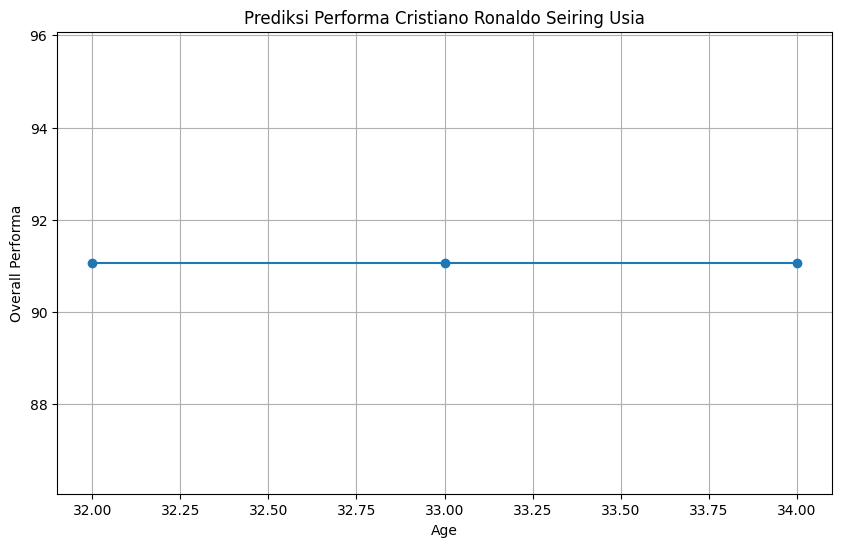

In [158]:
# Memprediksi Performa pada rentang usia
ages = list(range(32, 35))
performa = [predict_performance(age, features_pemain['height_cm'], features_pemain['weight_kg'],
                                    features_pemain['eur_value'], features_pemain['potential'],
                                    features_pemain['pac'], features_pemain['sho'], features_pemain['pas'],
                                    features_pemain['dri'], features_pemain['def'], features_pemain['phy'])[0]
                for age in ages]

# Plotting Performa seiring bertambahnya usia
plt.figure(figsize=(10, 6))
plt.plot(ages, performa, marker='o')
plt.title('Prediksi Performa Cristiano Ronaldo Seiring Usia')
plt.xlabel('Age')
plt.ylabel('Overall Performa')
plt.grid(True)
plt.show()